## sc-Analysis of sorted-senescent cells of Axolotl limb balstema

Here we start with the raw matrix produced by featureCount. Raw counts are filtered, transformed, and dimensionality rediction is performed. 
We subset the dataset with the exclusion of early cells sample for compatibility with Gerber et.al. dataset.

In [1]:
file.path(R.home("bin"), "R")

[1] "C:/Users/giovanni/anaconda3/envs/r4-base/lib/R/bin/x64/R"

In [2]:

library(Seurat)
library(sctransform)
library(dplyr)
library(tidyverse)
library(readxl)
library(stringr)
library(HDF5Array)
library(ggplot2)
library(viridis)

library("BiocParallel")
register(SnowParam(4))


Warning message:
"package 'Seurat' was built under R version 4.0.4"
Attaching SeuratObject

Warning message:
"package 'dplyr' was built under R version 4.0.4"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'tidyverse' was built under R version 4.0.5"
Registered S3 method overwritten by 'cli':
  method     from         
  print.boxx spatstat.geom

-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.1     v stringr 1.4.0
v tidyr   1.1.3     v forcats 0.5.1
v readr   1.4.0     

Warning message:
"package 'tidyr' was built under R version 4.0.4"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Warning message:
"package 'readxl

Read FeatureCounts table

In [4]:
ScData <- read.table(file = "../../Data/SenescentCells/bfx1267.AmexG_v6_DD.eAmexG_v6_DD.txt",
                     skip = 1, header = T,
                     row.names = 1, sep = "\t", stringsAsFactors = F)

In [5]:
ScData <- ScData[,-c(1:5)]

Creat Seurat Object

In [6]:
ScAxo <- CreateSeuratObject(counts = ScData, project = "Axolotl",
                            names.field = 1, names.delim = "_")
ScAxo

An object of class Seurat 
99218 features across 2832 samples within 1 assay 
Active assay: RNA (99218 features, 0 variable features)

In [7]:
table(ScAxo$orig.ident)
head(ScAxo@meta.data)
table(gsub("[^a-zA-Z]", "", ScAxo@meta.data$orig.ident))
ScAxo@meta.data$orig.ident <- factor(gsub("[^a-zA-Z]", "", ScAxo@meta.data$orig.ident))
table(ScAxo$orig.ident)


early01 early02   late1   late2   late3   late4   late5   late6   late7   late8 
    260     506     103      79      99     110      96     100      72     137 
  late9    mid1   mid11    mid2    mid3    mid4    mid6    mid7    mid8    mid9 
     26      91      93      38      35      58      77      33      46     105 
   pal1    pal2    pal3    pal4    pal5    pal6    pal7    pal8    pal9 
     26      54      88      72     140      76      65      61      86 

,orig.ident,nCount_RNA,nFeature_RNA
,<fct>,<dbl>,<int>
late9_05_C14,late9,107779,3244
pal1_01_A04,pal1,220091,3018
pal1_01_A02,pal1,10836,1232
pal1_01_A01,pal1,177896,2921
pal1_01_A06,pal1,237127,3504
pal1_01_A03,pal1,23481,1535



early  late   mid   pal 
  766   822   576   668 


early  late   mid   pal 
  766   822   576   668 

QC

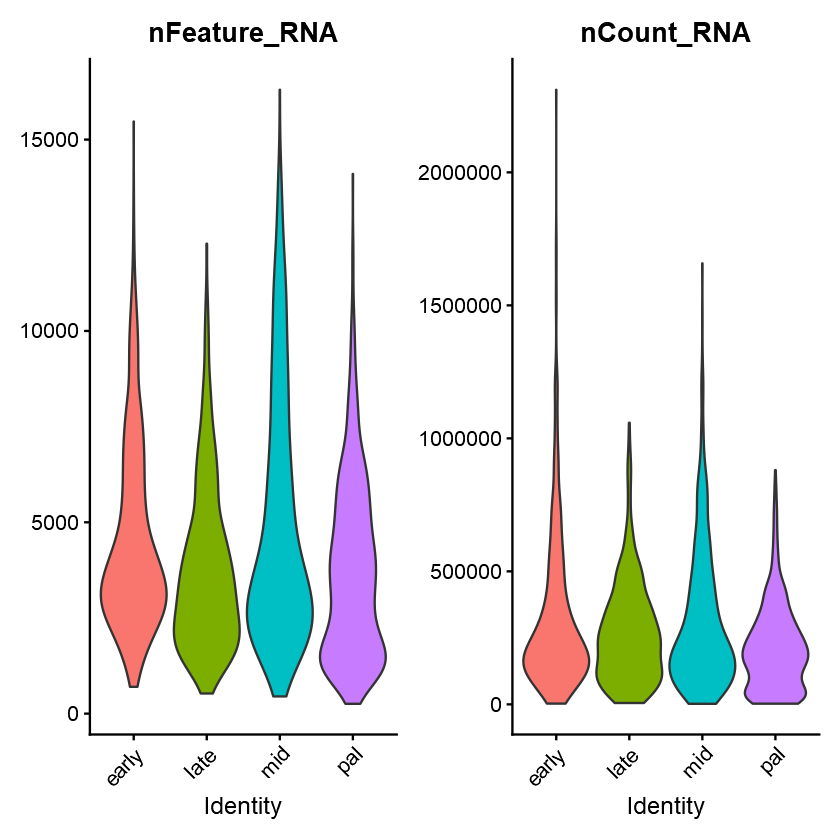

In [8]:
VlnPlot(ScAxo, features = c("nFeature_RNA", "nCount_RNA"), ncol = 2, 
        pt.size = 0, group.by = "orig.ident")

In [9]:
ScAxo <- subset(ScAxo, 
                subset = nFeature_RNA > 500)
ScAxo<- subset(ScAxo, 
                      subset = nCount_RNA < 1000000)
table(ScAxo$orig.ident)



early  late   mid   pal 
  736   820   561   666 

Process and normalise counts

In [10]:
ScAxo <- SCTransform(ScAxo, 
                     vars.to.regress = c("nCount_RNA"), 
                     verbose = TRUE)

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 37210 by 2783

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 2783 cells



  |                                                                      |   0%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |==================                                                    |  25%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |===================================                                   |  50%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in sqrt(1/i):
"Si è prodotto un NaN"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"

  |====================================================                  |  75%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |======================================================================| 100%


Found 15 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 37210 genes



  |======================================================================| 100%


Computing corrected count matrix for 37210 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 1.820632 mins

Determine variable features

Place corrected count matrix in counts slot

Regressing out nCount_RNA

Centering data matrix

Set default assay to SCT



Dimensionality reduction

In [11]:
ScAxo <- RunPCA(ScAxo, features = VariableFeatures(object = ScAxo))

dims.use = 1:30

PC_ 1 
Positive:  AMEX60DD007762, AMEX60DD018143, AMEX60DD029125, AMEX60DD016342, AMEX60DD052072, AMEX60DD016415, AMEX60DD052071, AMEX60DD052070, AMEX60DD016343, AMEX60DD031414 
	   AMEX60DDU001033597, AMEX60DD010609, AMEX60DD041991, AMEX60DD005903, AMEX60DD008686, AMEX60DDU001033599, AMEX60DD032830, AMEX60DD044430, AMEX60DD051892, AMEX60DD007278 
	   AMEX60DD056028, AMEX60DD024229, AMEX60DD026477, AMEX60DD049052, AMEX60DD009887, AMEX60DD030131, AMEX60DDU001017044, AMEX60DD043068, AMEX60DD032518, AMEX60DD017134 
Negative:  AMEX60DD022398, AMEX60DD055165, AMEX60DD009937, AMEX60DD046943, AMEX60DD049175, AMEX60DD030096, AMEX60DD055538, AMEX60DD007586, AMEX60DD055540, AMEX60DD005267 
	   AMEX60DD014606, AMEX60DD055164, AMEX60DD052377, AMEX60DD050718, AMEX60DD033627, AMEX60DD007589, AMEX60DD050822, AMEX60DD055459, AMEX60DD025550, AMEX60DD010079 
	   AMEX60DD034565, AMEX60DD013519, AMEX60DD055420, AMEX60DD029807, AMEX60DDU001001261, AMEX60DD016244, AMEX60DD018809, AMEX60DD010592, ERCC-00074,

In [12]:
ScAxo <- RunUMAP(ScAxo, dims = dims.use)
ScAxo <- FindNeighbors(ScAxo, dims = dims.use)
ScAxo <- FindClusters(ScAxo, resolution = 1)

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
12:16:00 UMAP embedding parameters a = 0.9922 b = 1.112

12:16:00 Read 2783 rows and found 30 numeric columns

12:16:00 Using Annoy for neighbor search, n_neighbors = 30

12:16:00 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:16:02 Writing NN index file to temp file C:\Users\giovanni\AppData\Local\Temp\Rtmpg71kp1\file564358a6ba0

12:16:02 Searching Annoy index using 1 thread, search_k = 3000

12:16:03 Annoy recall = 100%

12:16:05 Commencing smooth kNN distance calibration using 1 th

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2783
Number of edges: 94559

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8037
Number of communities: 17
Elapsed time: 0 seconds


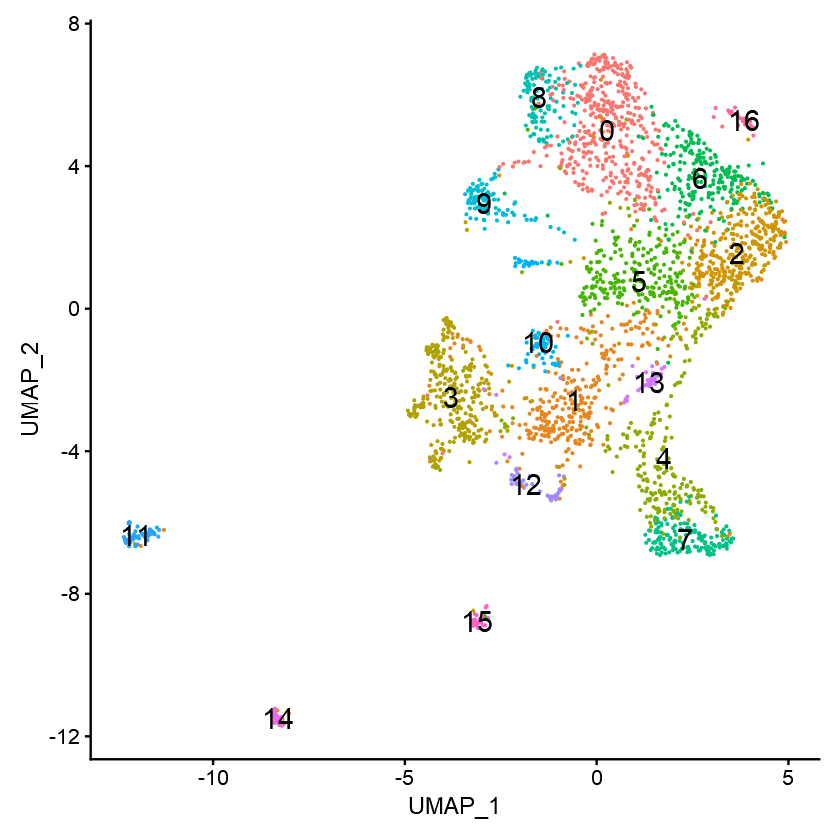

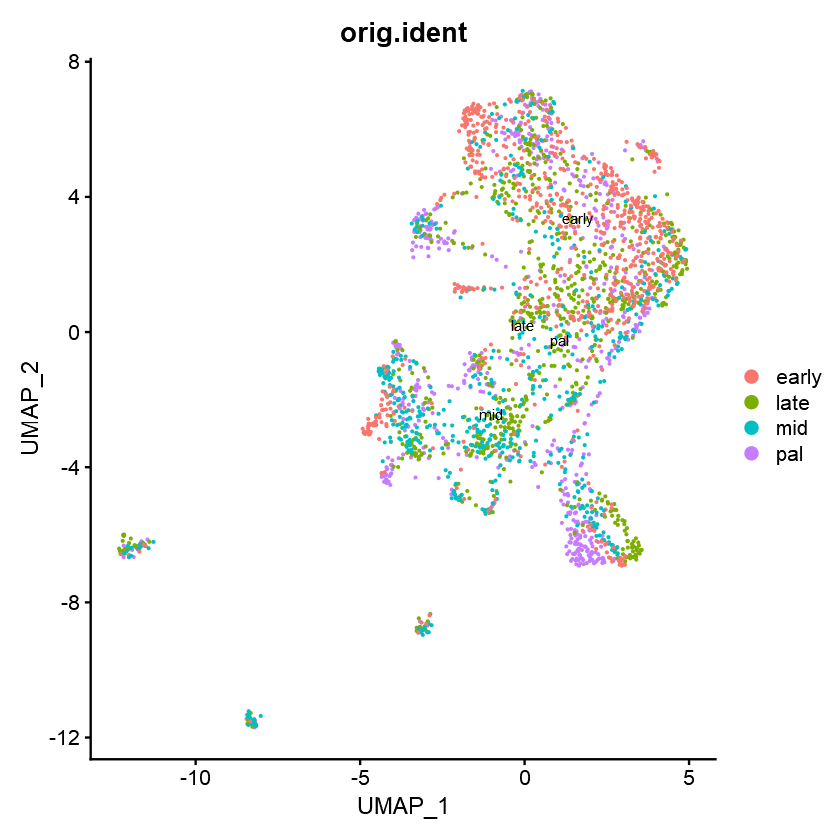

In [13]:
DimPlot(ScAxo, reduction = "umap", pt.size = 0.1, label = T, label.size = 6) + NoLegend()

DimPlot(ScAxo, reduction = "umap", pt.size = 0.1, label = T, 
        label.size = 3, group.by = "orig.ident", repel = T)

**Exclude EARLY data**

In [21]:
ScAxo_2 <- subset(x = ScAxo, subset = orig.ident != "early")
ScAxo_2

An object of class Seurat 
136428 features across 2047 samples within 2 assays 
Active assay: SCT (37210 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [22]:
ScAxo_2 <- subset(ScAxo_2, 
                subset = nFeature_RNA > 500)
ScAxo_2<- subset(ScAxo_2, 
               subset = nCount_RNA < 1000000)
table(ScAxo_2$orig.ident)



early  late   mid   pal 
    0   820   561   666 

In [23]:
ScAxo_2 <- SCTransform(ScAxo_2, 
                     vars.to.regress = c("nCount_RNA"), 
                     verbose = TRUE)

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 34481 by 2047

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 2047 cells



  |                                                                      |   0%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in sqrt(1/i):
"Si è prodotto un NaN"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"

  |==================                                                    |  25%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |===================================                                   |  50%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |====================================================                  |  75%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |======================================================================| 100%


There are 3 estimated thetas smaller than 1e-07 - will be set to 1e-07

Found 22 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 34481 genes



  |======================================================================| 100%


Computing corrected count matrix for 34481 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 1.292625 mins

Determine variable features

Place corrected count matrix in counts slot

Regressing out nCount_RNA

Centering data matrix

Set default assay to SCT



In [24]:
ScAxo_2 <- RunPCA(ScAxo_2, features = VariableFeatures(object = ScAxo_2))

PC_ 1 
Positive:  AMEX60DD055165, AMEX60DD022398, AMEX60DD009937, AMEX60DD046943, AMEX60DD049175, AMEX60DD055538, AMEX60DD030096, AMEX60DD007586, AMEX60DD055540, AMEX60DD014606 
	   AMEX60DD032400, AMEX60DD005267, ERCC-00130, ERCC-00074, AMEX60DD055164, AMEX60DD010592, AMEX60DD055459, AMEX60DD050718, AMEX60DD035361, AMEX60DD055769 
	   AMEX60DD003509, AMEX60DD033627, AMEX60DD052377, ERCC-00096, AMEX60DD044981, AMEX60DDU001031601, AMEX60DDU001015948, AMEX60DD007589, AMEX60DDU001010113, AMEX60DDU001033882 
Negative:  AMEX60DD007762, AMEX60DD005903, AMEX60DD041056, AMEX60DD008686, AMEX60DD049052, AMEX60DD020392, AMEX60DD016342, AMEX60DD051157, AMEX60DD026477, AMEX60DD010609 
	   AMEX60DD054072, AMEX60DD017134, AMEX60DD016343, AMEX60DD032518, AMEX60DD050609, AMEX60DD030131, AMEX60DD028300, AMEX60DD025725, AMEX60DDU001033597, AMEX60DD029125 
	   AMEX60DD020550, AMEX60DD041751, AMEX60DDU001033599, AMEX60DDU001025685, AMEX60DD052072, AMEX60DD052071, AMEX60DD047676, AMEX60DD052070, AMEX60DD024

In [25]:
dims.use = 1:30

In [26]:
ScAxo_2 <- RunUMAP(ScAxo_2, dims = dims.use)
ScAxo_2 <- FindNeighbors(ScAxo_2, dims = dims.use)
ScAxo_2 <- FindClusters(ScAxo_2, resolution = 1)

12:18:01 UMAP embedding parameters a = 0.9922 b = 1.112

12:18:01 Read 2047 rows and found 30 numeric columns

12:18:01 Using Annoy for neighbor search, n_neighbors = 30

12:18:01 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:18:03 Writing NN index file to temp file C:\Users\giovanni\AppData\Local\Temp\Rtmpg71kp1\file5644d94868

12:18:03 Searching Annoy index using 1 thread, search_k = 3000

12:18:04 Annoy recall = 100%

12:18:04 Commencing smooth kNN distance calibration using 1 thread

12:18:05 Initializing from normalized Laplacian + noise

12:18:06 Commencing optimization for 500 epochs, with 86632 positive edges

12:18:16 Optimization finished

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2047
Number of edges: 70422

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7990
Number of communities: 15
Elapsed time: 0 seconds


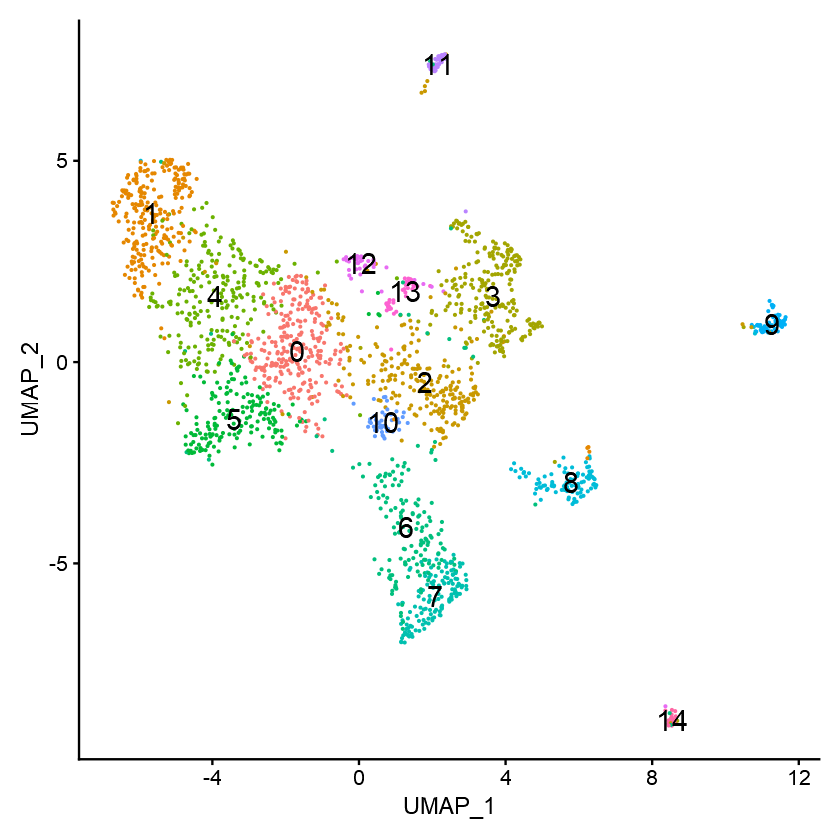

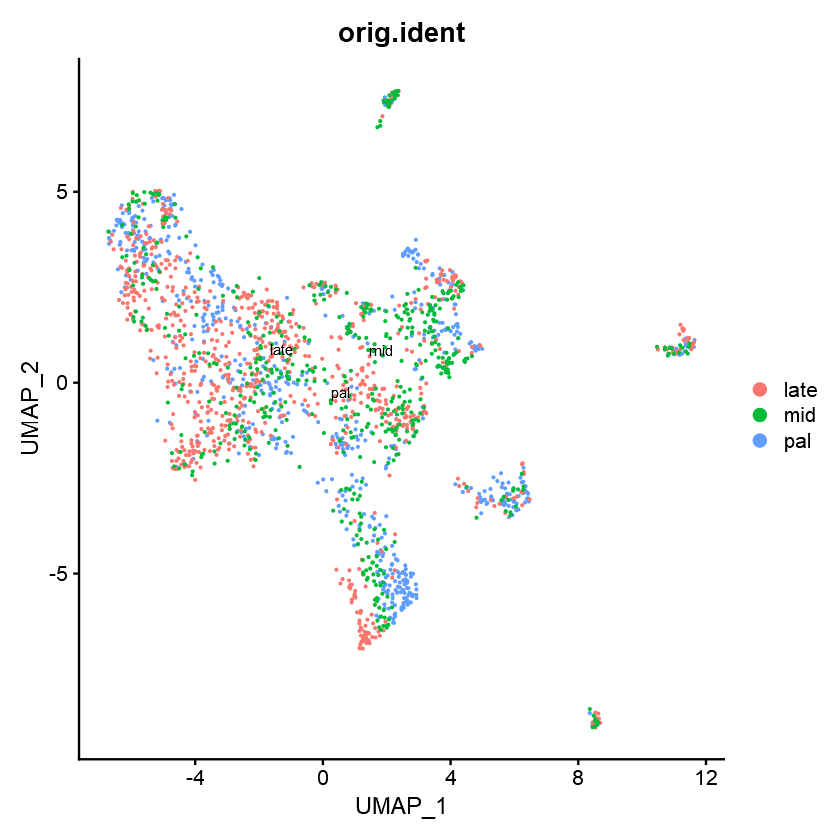

In [27]:
DimPlot(ScAxo_2, reduction = "umap", pt.size = 0.1, label = T, label.size = 6) + NoLegend()

DimPlot(ScAxo_2, reduction = "umap", pt.size = 0.1, label = T, 
        label.size = 3, group.by = "orig.ident", repel = T)

In [28]:
saveRDS(ScAxo_2, file = "Yu_Seurat_NoEarly.rds")

In [29]:
# Set reticulate to use your preferred python version
reticulate::use_python("C:/Users/giovanni/anaconda3/envs/python39/python.exe")

In [30]:
reticulate::py_config()

python:         C:/Users/giovanni/anaconda3/envs/python39/python.exe
libpython:      C:/Users/giovanni/anaconda3/envs/python39/python39.dll
pythonhome:     C:/Users/giovanni/anaconda3/envs/python39
version:        3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
Architecture:   64bit
numpy:          C:/Users/giovanni/anaconda3/envs/python39/Lib/site-packages/numpy
numpy_version:  1.20.3

python versions found: 
 C:/Users/giovanni/anaconda3/envs/python39/python.exe
 C:/Users/giovanni/anaconda3/python.exe
 C:/Users/giovanni/anaconda3/envs/4-rstudio/python.exe
 C:/Users/giovanni/anaconda3/envs/R-env/python.exe
 C:/Users/giovanni/anaconda3/envs/r4-base/python.exe
 C:/Users/giovanni/anaconda3/envs/spyder/python.exe

In [31]:
sceasy::convertFormat(ScAxo_2, from="seurat", to="anndata",
                       outFile='Yu_Seurat_NoEarly.h5ad')

AnnData object with n_obs × n_vars = 2047 × 99218
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.1', 'seurat_clusters'
    var: 'name'
    obsm: 'X_pca', 'X_umap'